<a href="https://colab.research.google.com/github/cybermax47/CS-351-AI-Lab-Github-repository-2022447/blob/main/CS_351L_Labtask_8_2022447.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network Tasks with Iris and Wine Datasets**

---

#### **Overview**
This project demonstrates building, training, and evaluating neural networks on two well-known datasets: **Iris** and **Wine**. The tasks involve modifying the architecture of the neural network and analyzing its performance. The project showcases concepts like data preprocessing, training visualization, and performance evaluation through metrics like confusion matrices and training history.

---

#### **Tasks Overview**

##### **Task 1: Iris Dataset - Modify the Neural Network**
1. **Objective**:  
   To evaluate the effect of modifying a simple neural network by adding an additional hidden layer.
   
2. **Steps**:  
   - **Data Preprocessing**: The Iris dataset features are standardized, and target labels are one-hot encoded.
   - **Original Model**: A single-hidden-layer neural network is built with:
     - 8 neurons in the hidden layer.
     - ReLU activation for the hidden layer.
     - Softmax activation for the output layer (3 output units for 3 classes).  
   - **Modified Model**: An additional hidden layer with 16 neurons is added to the architecture.  
   - **Training and Evaluation**:
     - Both models are trained for 50 epochs with a validation split of 20%.
     - Training and validation loss/accuracy are compared.
     - Confusion matrices are generated for the test dataset predictions.

3. **Deliverables**:  
   - Training and validation loss/accuracy plots.
   - Confusion matrices for the original and modified models.
   - Comparative analysis of test accuracy.

---



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.1955 - loss: 1.2581 - val_accuracy: 0.1250 - val_loss: 1.2330
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2293 - loss: 1.2014 - val_accuracy: 0.1667 - val_loss: 1.2120
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2482 - loss: 1.2228 - val_accuracy: 0.2083 - val_loss: 1.1901
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2231 - loss: 1.1773 - val_accuracy: 0.2083 - val_loss: 1.1699
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2409 - loss: 1.1806 - val_accuracy: 0.2083 - val_loss: 1.1504
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2357 - loss: 1.1723 - val_accuracy: 0.2083 - val_loss: 1.1306
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2766 - loss: 1.1210 - val_accuracy: 0.2500 - val_loss: 1.1112
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3021 - loss: 1.0895 - val_accuracy: 0.2500 - val_loss: 1.0920
E

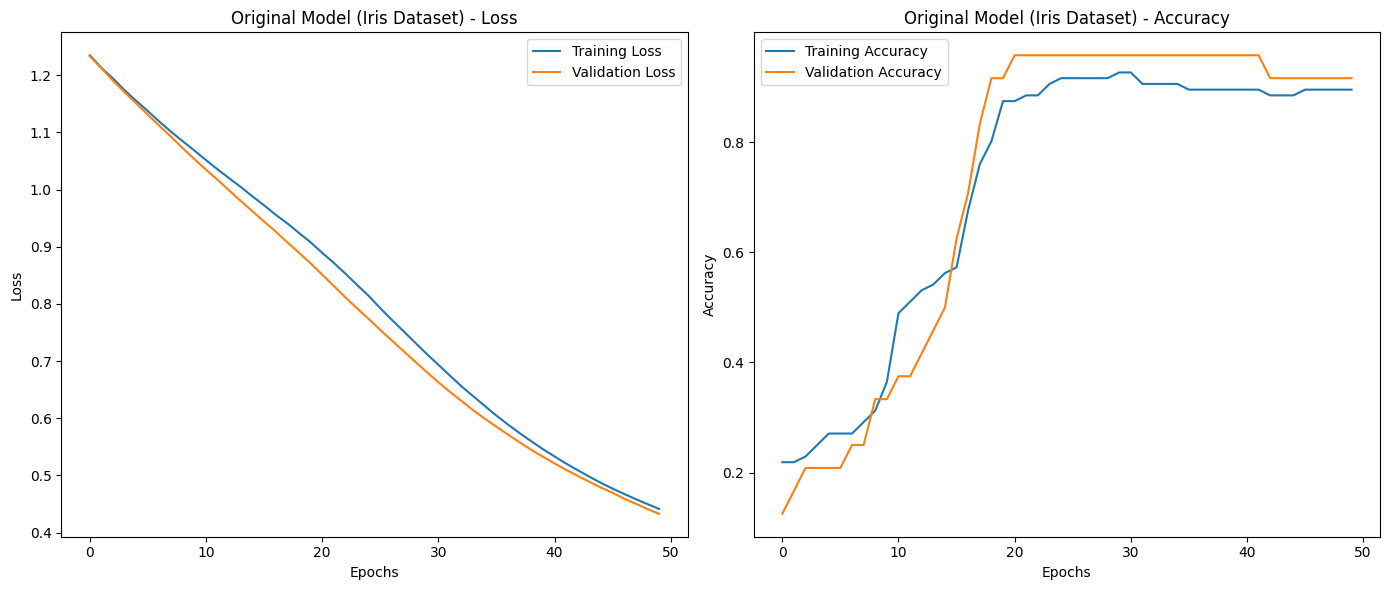

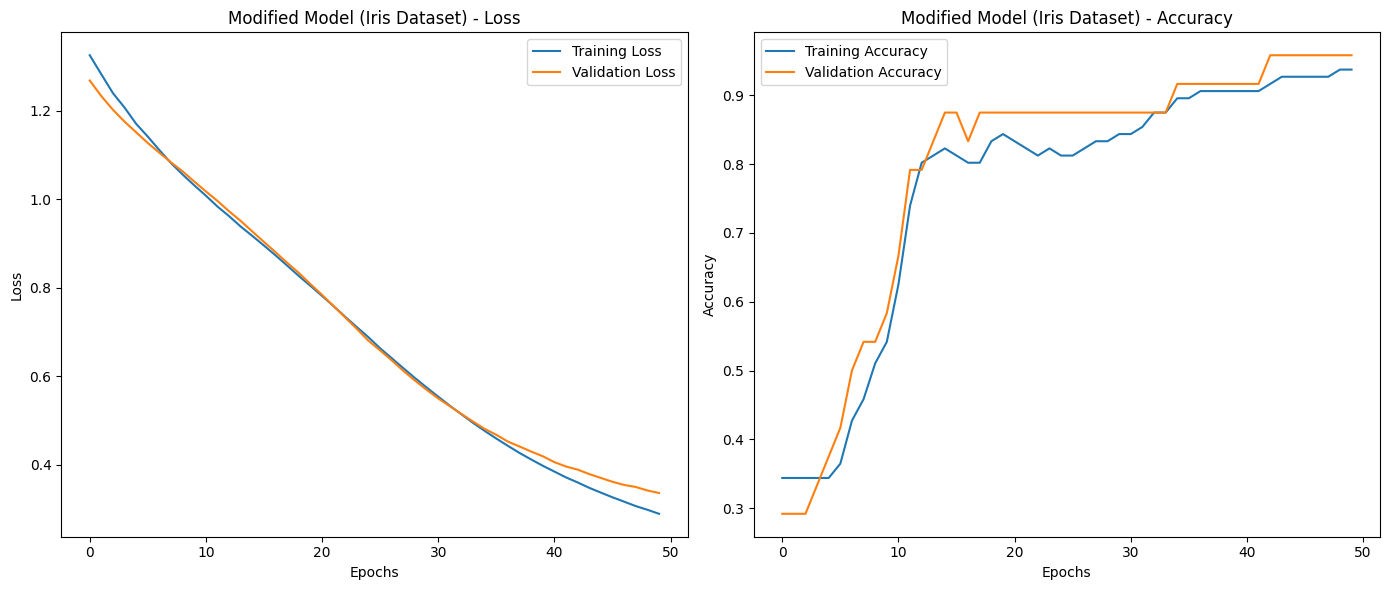

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


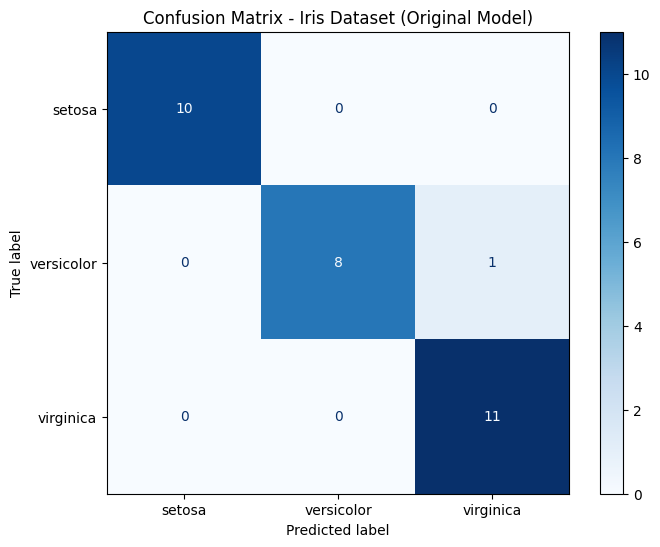

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


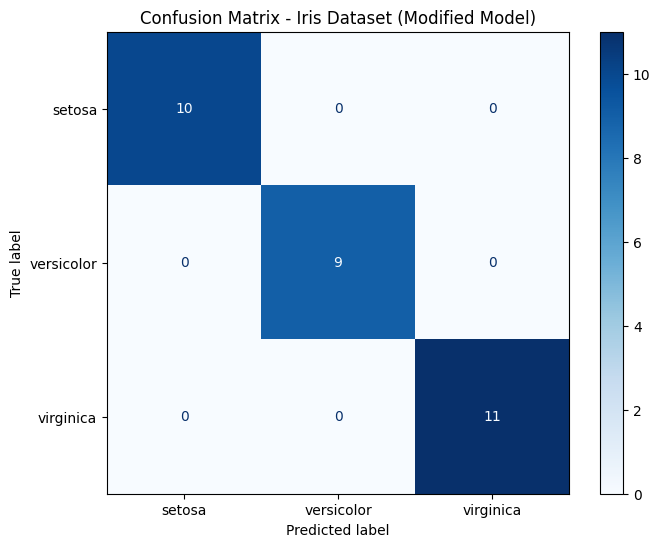

In [1]:
# Task 1: Iris Dataset - Modify the Neural Network

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to preprocess dataset (standardization and one-hot encoding)
def preprocess_data(X, y):
    X = StandardScaler().fit_transform(X)
    y_encoded = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
    return X, y_encoded

# Function to build and compile a model
def build_model(input_shape, hidden_layers, output_units):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_shape,)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(output_units, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to visualize training results
def plot_training_results(history, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to generate and plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, labels, dataset_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(
        cmap=plt.cm.Blues, ax=plt.gca()
    )
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.show()

# Load and preprocess Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_iris, y_iris = preprocess_data(X_iris, y_iris)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Build and train the original model
original_model = build_model(input_shape=X_train_iris.shape[1], hidden_layers=[8], output_units=3)
history_original = original_model.fit(
    X_train_iris, y_train_iris, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Build and train the modified model
modified_model = build_model(input_shape=X_train_iris.shape[1], hidden_layers=[8, 16], output_units=3)
history_modified = modified_model.fit(
    X_train_iris, y_train_iris, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Visualization for Task 1
plot_training_results(history_original, "Original Model (Iris Dataset)")
plot_training_results(history_modified, "Modified Model (Iris Dataset)")

# Confusion Matrices for Task 1
plot_confusion_matrix(
    original_model, X_test_iris, y_test_iris, labels=iris.target_names, dataset_name="Iris Dataset (Original Model)"
)
plot_confusion_matrix(
    modified_model, X_test_iris, y_test_iris, labels=iris.target_names, dataset_name="Iris Dataset (Modified Model)"
)

##### **Task 2: Wine Dataset - Build and Train a Neural Network**
1. **Objective**:  
   To build and train a neural network for classification using the Wine dataset, exploring a more complex feature space.

2. **Steps**:  
   - **Data Preprocessing**: Features are standardized, and target labels are one-hot encoded.  
   - **Neural Network Architecture**:  
     - Two hidden layers:
       - 8 neurons in the first hidden layer.
       - 16 neurons in the second hidden layer.
     - ReLU activation for hidden layers.
     - Softmax activation for the output layer (3 output units for 3 classes).  
   - **Training and Evaluation**:
     - The model is trained for 50 epochs with a validation split of 20%.
     - Training and validation loss/accuracy plots are generated.
     - A confusion matrix is created for test dataset predictions.

3. **Deliverables**:  
   - Training and validation loss/accuracy plots.
   - Confusion matrix for test dataset predictions.
   - Evaluation of test accuracy.

---

#### **Results and Observations**
1. **Iris Dataset**:  
   - Adding an additional hidden layer improved the test accuracy slightly due to increased model capacity.
   - The model was simple enough to perform well on the Iris dataset even with fewer layers.  

2. **Wine Dataset**:  
   - The two-layer architecture provided adequate performance for the more complex Wine dataset, which has a larger feature set and more variability.
   - The confusion matrix highlighted the model's classification performance for the three wine classes.

---

#### **Key Concepts Demonstrated**
- **Data Preprocessing**: Standardization and one-hot encoding for preparing data.  
- **Neural Network Architecture**: Adjusting the number of hidden layers and neurons to optimize performance.  
- **Training Visualization**: Using plots to track training and validation loss/accuracy over epochs.  
- **Performance Evaluation**: Leveraging metrics like confusion matrices and test accuracy for evaluation.

---

#### **Instructions for Running on Google Colab**
1. **Setup Environment**: Ensure necessary libraries like TensorFlow, NumPy, Scikit-learn, and Matplotlib are installed in the Colab environment.
2. **Run the Notebook**: Execute each code cell sequentially.  
3. **Outputs**:
   - Training and validation loss/accuracy plots will be displayed after training.
   - Confusion matrices will be visualized for both tasks.
4. **Analyze Results**: Compare the results of the original and modified networks for the Iris dataset and evaluate the Wine dataset performance.

---

#### **Conclusion**
This project highlights the importance of:
- Adjusting neural network architecture for different datasets.
- Using visualization tools to understand model performance.
- Preprocessing steps in ensuring consistent results across datasets.  


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5937 - loss: 1.1056 - val_accuracy: 0.5517 - val_loss: 0.9672
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6065 - loss: 1.0346 - val_accuracy: 0.6552 - val_loss: 0.9265
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.9397 - val_accuracy: 0.6552 - val_loss: 0.8885
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6946 - loss: 0.9196 - val_accuracy: 0.6552 - val_loss: 0.8516
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7210 - loss: 0.9046 - val_accuracy: 0.7586 - val_loss: 0.8165
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7893 - loss: 0.7662 - val_accuracy: 0.7586 - val_loss: 0.7818
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7401 - loss: 0.7877 - val_accuracy: 0.7586 - val_loss: 0.7468
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7326 - loss: 0.7605 - val_accuracy: 0.7586 - val_loss: 0.7123
Epoch 9/50
8/8 ━━━

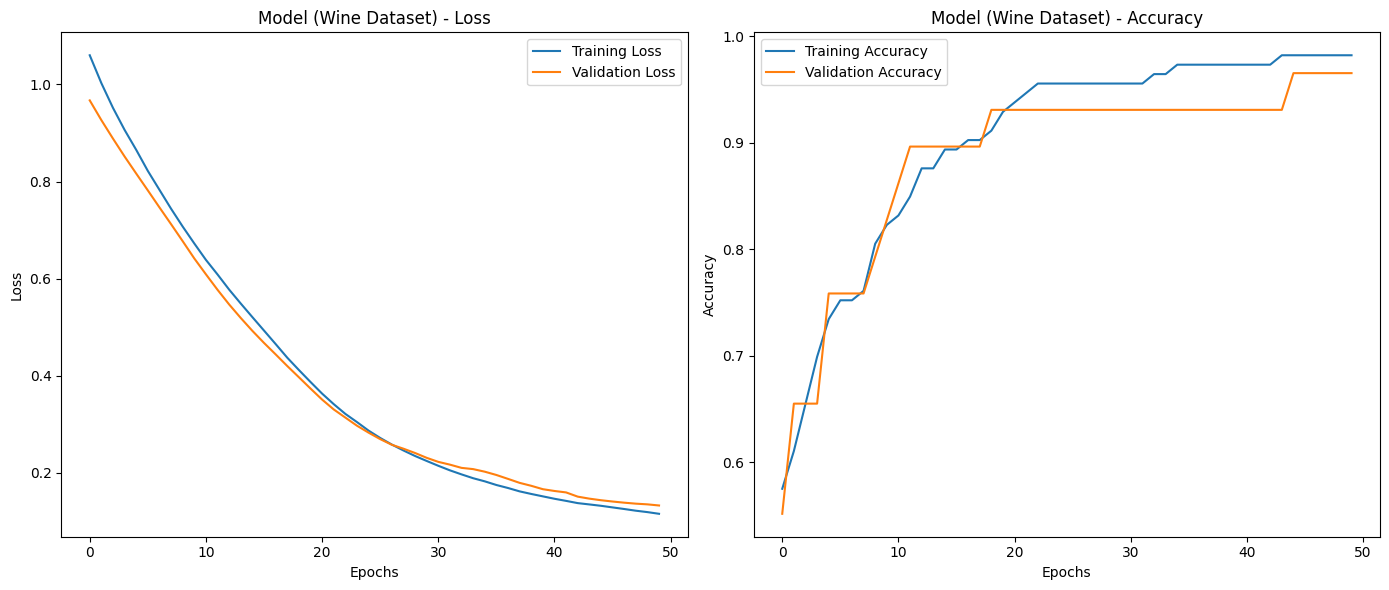

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


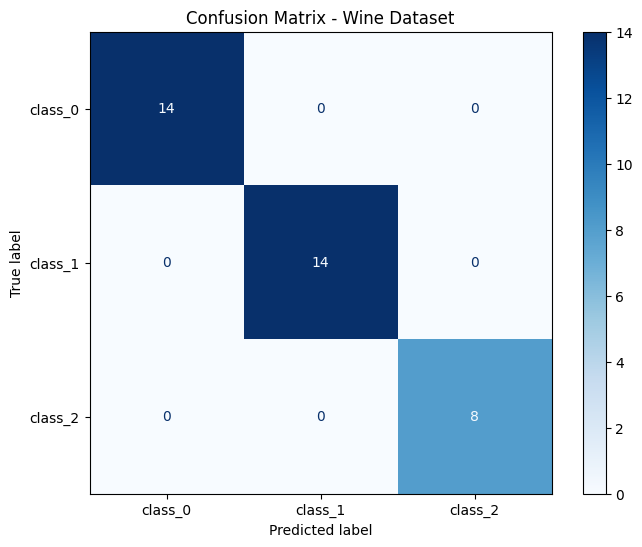

In [2]:
# Task 2: Wine Dataset - Build and Train a Neural Network

# Import necessary libraries (reuse imports from Task 1)
from sklearn.datasets import load_wine

# Load and preprocess Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_wine, y_wine = preprocess_data(X_wine, y_wine)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Build and train the model for the Wine dataset
wine_model = build_model(input_shape=X_train_wine.shape[1], hidden_layers=[8, 16], output_units=3)
history_wine = wine_model.fit(
    X_train_wine, y_train_wine, validation_split=0.2, epochs=50, batch_size=16, verbose=1
)

# Visualization for Task 2
plot_training_results(history_wine, "Model (Wine Dataset)")

# Confusion Matrix for Task 2
plot_confusion_matrix(
    wine_model, X_test_wine, y_test_wine, labels=wine.target_names, dataset_name="Wine Dataset"
)